# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS
## Week 6 - Monte Carlo

In [19]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from scipy.special import gamma

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

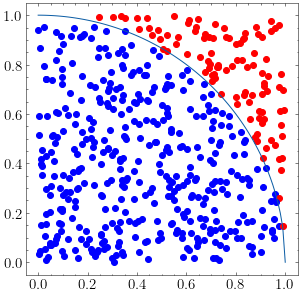

In [20]:
# Finding the area of a circle (and pi)

N = 500 # Number of trials
Ns = 0  # Sum of the trials inside the circle 

for i in range(N):
    x, y = np.random.random(2)
    if (x**2 + y**2) < 1.0: # Check if the random (x,y) is inside the circle
        plt.scatter(x, y, c='b')
        Ns += 1
    else:
        plt.scatter(x, y, c='r')
        
dx = 0.01
x = np.arange(0, 1.0+dx, dx)
plt.plot(x, np.sqrt(1-x**2))
plt.axis('scaled')
plt.show()

In [21]:
I = 4*(Ns/N) # Multiplying by 4 because we only calculated one quadrant
print(f"A = {I}")

A = 3.184


In [22]:
# Generalizing for N dim hypersphere

def hypersphere_volume(d, r=1):
    """Exact volume of a hypersphere of d dimension."""
    return (2*(np.pi**(d/2))*(r**d))/(gamma(d/2)*d)
    
    
N = 1000
d = 3

Ns = 0
for i in range(N):
    if np.sum(np.random.random(d)**2) < 1.0:
        Ns +=1

V = (2**d)*Ns/N
V_ex = hypersphere_volume(d)

print(f"Numerical volume: {V}")
print(f"Exact volume: {V_ex}")

Numerical volume: 4.104
Exact volume: 4.188790204786391


In [23]:
# Checking for different d

d_list = np.arange(2,8)

def monte_carlo_hypersphere(d, N=1000):
    Ns = 0
    for i in range(N):
        if np.sum(np.random.random(d)**2) < 1.0:
            Ns +=1
    V = (2**d)*Ns/N
    return V

V_mc = np.array([monte_carlo_hypersphere(d, N=1000) for d in d_list])
V_ex = np.array([np.round(hypersphere_volume(d), 3) for d in d_list])
dV = np.abs(V_mc - V_ex)


print(f"d = {d_list}")
print(f"V_mc = {V_mc}")
print(f"V_ex = {V_ex}")
print(f"dV   = {dV}")

d = [2 3 4 5 6 7]
V_mc = [3.172 4.128 4.528 5.408 5.248 4.736]
V_ex = [3.142 4.189 4.935 5.264 5.168 4.725]
dV   = [0.03  0.061 0.407 0.144 0.08  0.011]


In [24]:
# Checking for different N

N_values = [100, 1000, 10000, 1000000]
V_mc_N = np.array([[monte_carlo_hypersphere(d, N) for d in d_list] for N in N_values])
dV = np.abs(V_mc_N - V_ex)

In [25]:
print(V_mc_N)

[[3.04     3.92     4.16     6.4      7.04     3.84    ]
 [3.108    4.112    5.056    5.664    4.224    4.224   ]
 [3.1476   4.1976   4.8976   5.472    5.12     4.7232  ]
 [3.140952 4.188376 4.927472 5.2688   5.169216 4.720768]]


In [26]:
print(dV)

[[1.020e-01 2.690e-01 7.750e-01 1.136e+00 1.872e+00 8.850e-01]
 [3.400e-02 7.700e-02 1.210e-01 4.000e-01 9.440e-01 5.010e-01]
 [5.600e-03 8.600e-03 3.740e-02 2.080e-01 4.800e-02 1.800e-03]
 [1.048e-03 6.240e-04 7.528e-03 4.800e-03 1.216e-03 4.232e-03]]


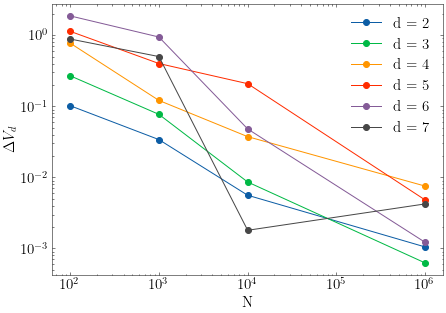

In [27]:
for d in range(6):
    plt.plot(N_values, dV[:,d], marker='o', label=f"d = {d+2}")

plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('$\Delta V_{d}$')
plt.legend()
plt.show()

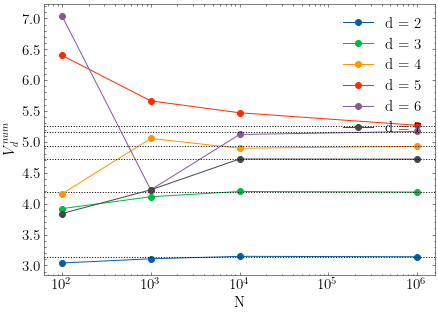

In [28]:
for d in range(6):
    plt.plot(N_values, V_mc_N[:,d], marker='o', label=f"d = {d+2}")
    plt.axhline(V_ex[d], ls=':', c='k')

plt.xscale('log')
plt.xlabel('N')
plt.ylabel('$V^{num}_{d}$')
plt.legend()
plt.show()

In [29]:
V_mc = np.array([monte_carlo_hypersphere(d, N=1000000) for d in d_list])
dV = np.abs(V_mc - V_ex)

In [30]:
print(V_mc)

[3.142576 4.185744 4.939264 5.25584  5.159424 4.745728]


In [31]:
print(dV)

[0.000576 0.003256 0.004264 0.00816  0.008576 0.020728]


In [32]:
print((dV/V_mc)*100)

[0.01832891 0.07778784 0.08632865 0.15525587 0.16622011 0.43677177]


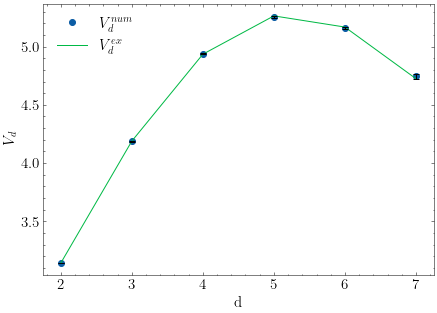

In [34]:
plt.plot(d_list, V_mc, marker='o', ls='', label='$V^{num}_{d}$')
plt.plot(d_list, V_ex, label='$V^{ex}_{d}$')
plt.errorbar(d_list, V_mc, yerr=dV, fmt=' ', ecolor='k', capsize=3)
plt.xlabel('d')
plt.ylabel('$V_{d}$')
plt.legend()
plt.show()

In [35]:
dV

array([0.000576, 0.003256, 0.004264, 0.00816 , 0.008576, 0.020728])